# **Deep Learning Project: Street View Housing Number Digit Recognition**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

In [ ]:
# mount to Drive
from google.colab import drive # mount to Drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np # data processing
import pandas as pd # tabular data analysis
import matplotlib.pyplot as plt # stat plots
import seaborn as sns # plotting

from sklearn.model_selection import train_test_split # partition the data into train set and test set
from sklearn.preprocessing import MinMaxScaler # normalize vectors in preprocessing

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD

**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.15.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py
h5file = h5py.File('/content/drive/MyDrive/MIT ADSP/7. Elective Project/SVHN_single_grey1.h5', 'r')

X_train = h5file['X_train'][:]
y_train = h5file['y_train'][:]

X_test = h5file['X_test'][:]
y_test = h5file['y_test'][:]

h5file.close()

Check the number of images in the training and the testing dataset.

In [ ]:
print(f"There are {len(X_train)} images in the training data set.")
print(f"There are {len(X_test)} images in the testing data set.")

There are 42000 images in the training data set.
There are 18000 images in the testing data set.


**Observation:** There are 42000 images in the training data set.
There are 18000 images in the testing data set.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

The first ten images in the training set are:


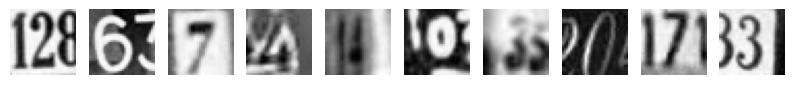

with corresponding labels:
[2 6 7 4 4 0 3 0 7 3]


In [ ]:
fig = plt.figure(figsize = (10, 2))

for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.imshow(X_train[i], cmap = 'Greys')
  plt.axis('off')

print('The first ten images in the training set are:')
plt.show()
print('with corresponding labels:')
print(y_train[0:10])

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print(f"The shape of the first image is {X_train[0].shape}.")
print()
print('The array of pixels for the first image is:')
print(f"{X_train[0]}")

The shape of the first image is (32, 32).

The array of pixels for the first image is:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# The images are 2D arrays, 32 by 32 = 1024 pixels
# Convert to each to a 1D array
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [ ]:
# Normalize (0,255) -> (0, 1) by dividing each term by 255
X_train, X_test = X_train/255.0, X_test/255.0

Print the shapes of Training and Test data

In [ ]:
print(f"The shape of the training data is {X_train.shape}, with corresponding target variable of shape {y_train.shape}.")
print(f"The shape of the test data is {X_test.shape}, with corresponding target variable of shape {y_test.shape}.")

The shape of the training data is (42000, 1024), with corresponding target variable of shape (42000,).
The shape of the test data is (18000, 1024), with corresponding target variable of shape (18000,).


### **One-hot encode output**

In [ ]:
# Encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
The target variable is now assigned to a one-hot encoded row vector corresponding to its label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
import keras

In [ ]:
def nn_model_1():
  model = keras.Sequential()
  model.add(Dense(64, activation = 'relu', input_shape = (1024,)))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  optimizer = Adam(learning_rate = 0.001)
  model.compile(optimizer = optimizer, loss = 'categorical_crossentropy',  metrics = ['accuracy'])
  return model

nn_model_1()

In [ ]:
model_1 = nn_model_1()
print(model_1.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20
model_1_v1 = model_1.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_split = 0.10)

Epoch 1/20
296/296 [==============================] - 3s 4ms/step - loss: 2.3025 - accuracy: 0.1047 - val_loss: 2.2955 - val_accuracy: 0.1198
Epoch 2/20
296/296 [==============================] - 1s 4ms/step - loss: 2.1475 - accuracy: 0.1951 - val_loss: 1.9371 - val_accuracy: 0.3324
Epoch 3/20
296/296 [==============================] - 1s 3ms/step - loss: 1.7718 - accuracy: 0.3911 - val_loss: 1.6579 - val_accuracy: 0.4486
Epoch 4/20
296/296 [==============================] - 1s 3ms/step - loss: 1.5348 - accuracy: 0.4982 - val_loss: 1.4563 - val_accuracy: 0.5267
Epoch 5/20
296/296 [==============================] - 1s 4ms/step - loss: 1.4065 - accuracy: 0.5395 - val_loss: 1.3380 - val_accuracy: 0.5790
Epoch 6/20
296/296 [==============================] - 1s 4ms/step - loss: 1.3369 - accuracy: 0.5649 - val_loss: 1.3011 - val_accuracy: 0.5769
Epoch 7/20
296/296 [==============================] - 1s 5ms/step - loss: 1.2798 - accuracy: 0.5881 - val_loss: 1.2599 - val_accuracy: 0.5914
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

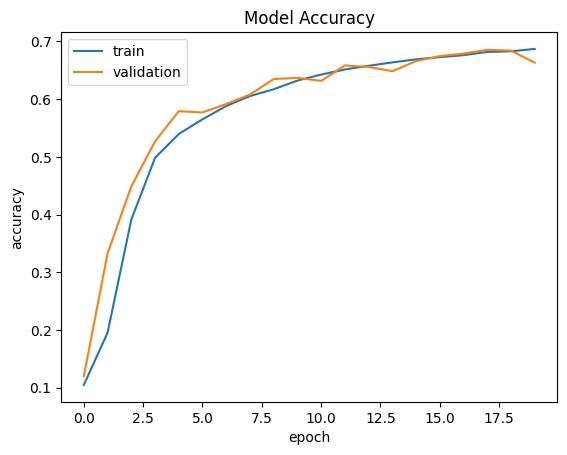

In [ ]:
plt.plot(model_1_v1.history['accuracy'])
plt.plot(model_1_v1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

563/563 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.63      0.70      0.67      1814
           1       0.67      0.70      0.68      1828
           2       0.75      0.66      0.70      1803
           3       0.61      0.63      0.62      1719
           4       0.74      0.67      0.71      1812
           5       0.60      0.69      0.64      1768
           6       0.71      0.63      0.67      1832
           7       0.72      0.73      0.73      1808
           8       0.66      0.55      0.60      1812
           9       0.58      0.66      0.62      1804

    accuracy                           0.66     18000
   macro avg       0.67      0.66      0.66     18000
weighted avg       0.67      0.66      0.66     18000



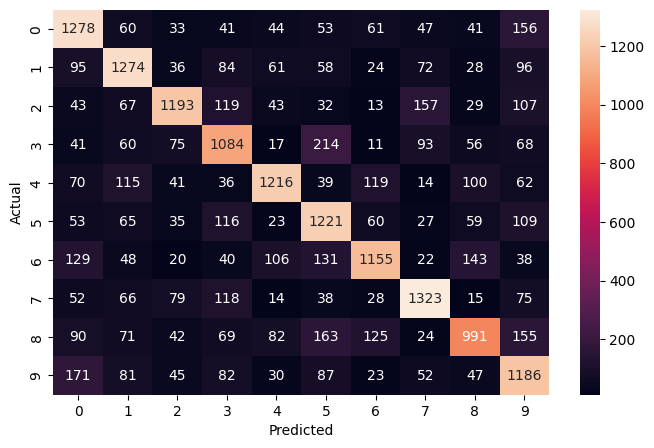

In [ ]:
# Plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_1.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
model_1.evaluate(X_test, (y_test))

563/563 [==============================] - 1s 2ms/step - loss: 1.0936 - accuracy: 0.6623


[1.0935910940170288, 0.6622777581214905]

**Observations:** There is some noise in the validation, and the model is not very accurate. The predicted accuracy is about 66%. From the confusion matrix, we can see how frequently digits are misclassified. For example, over 12% of 3s are misclassified as 5s. We may be able to improve accuracy by increasing the complexity of the model.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

import numpy as np
import tensorflow as tf

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
import keras

def nn_model_2():
  model = keras.Sequential()
  model.add(Dense(256, activation = 'relu', input_shape = (1024,)))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.20))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation = 'softmax'))
  optimizer = Adam(learning_rate = 0.0005)
  model.compile(optimizer = optimizer, loss = 'categorical_crossentropy',  metrics = ['accuracy'])
  return model

nn_model_2()

In [ ]:
model_2 = nn_model_2()
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)               

In [ ]:
# validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30
model_2_v1 = model_2.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_split = 0.20)

Epoch 1/20
263/263 [==============================] - 6s 7ms/step - loss: 2.3374 - accuracy: 0.1029 - val_loss: 2.3059 - val_accuracy: 0.1055
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 2.2153 - accuracy: 0.1543 - val_loss: 2.1420 - val_accuracy: 0.2596
Epoch 3/20
263/263 [==============================] - 2s 6ms/step - loss: 1.7231 - accuracy: 0.3985 - val_loss: 1.5772 - val_accuracy: 0.5090
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3954 - accuracy: 0.5416 - val_loss: 1.2772 - val_accuracy: 0.5849
Epoch 5/20
263/263 [==============================] - 2s 7ms/step - loss: 1.2010 - accuracy: 0.6138 - val_loss: 1.1026 - val_accuracy: 0.6496
Epoch 6/20
263/263 [==============================] - 2s 7ms/step - loss: 1.1311 - accuracy: 0.6415 - val_loss: 1.0559 - val_accuracy: 0.6643
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.0742 - accuracy: 0.6581 - val_loss: 1.0039 - val_accuracy: 0.6824
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

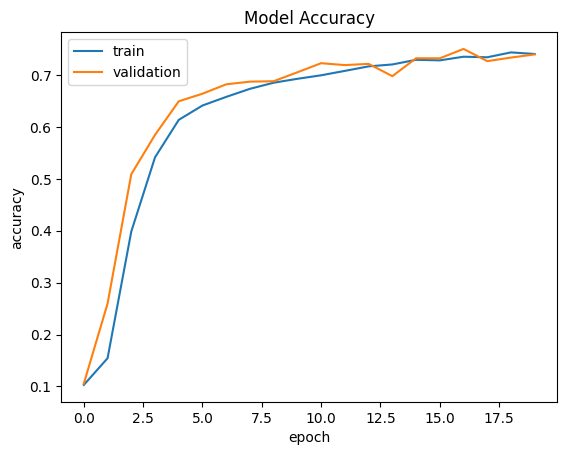

In [ ]:
plt.plot(model_2_v1.history['accuracy'])
plt.plot(model_2_v1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

**Observations:** There is still noise in the validation, but accuracy improved to about 74%.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

563/563 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1814
           1       0.82      0.74      0.78      1828
           2       0.82      0.75      0.78      1803
           3       0.77      0.66      0.71      1719
           4       0.72      0.82      0.76      1812
           5       0.71      0.69      0.70      1768
           6       0.68      0.77      0.72      1832
           7       0.84      0.76      0.80      1808
           8       0.67      0.70      0.68      1812
           9       0.79      0.68      0.73      1804

    accuracy                           0.74     18000
   macro avg       0.75      0.74      0.74     18000
weighted avg       0.75      0.74      0.74     18000



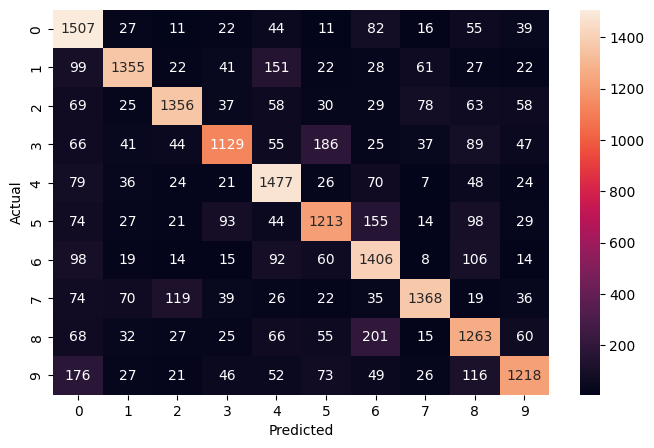

In [ ]:
# Plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_2.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:** We improved accuracy significantly by increasing the complexity and number of layers, and reduced over fitting by including a drop out layer. Accuracy increased from 66% to 75%. The model still struggles to accurately classify 3s.

## **Using Convolutional Neural Networks**

In [ ]:
# Clear backend & install libraries
from tensorflow.keras import backend
backend.clear_session()

import numpy as np
import tensorflow as tf

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
import h5py
h5file = h5py.File('/content/drive/MyDrive/MIT ADSP/7. Elective Project/SVHN_single_grey1.h5', 'r')

X_train = h5file['X_train'][:]
y_train = h5file['y_train'][:]
X_test = h5file['X_test'][:]
y_test = h5file['y_test'][:]

h5file.close()

Check the number of images in the training and the testing dataset.

In [ ]:
print(f"There are {len(X_train)} images in the training data set.")
print(f"There are {len(X_test)} images in the testing data set.")

There are 42000 images in the training data set.
There are 18000 images in the testing data set.


**Observation:** There are 42000 images in the training data set.
There are 18000 images in the testing data set.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print(f"The shape of the first training image is {X_train[0].shape}.")
print()
print('The array of pixels for the first training image is:')
print(f"{X_train[0]}")

The shape of the first training image is (32, 32).

The array of pixels for the first training image is:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# The images are 2D arrays, 32 by 32 = 1024 pixels
# Convert to each to a 1D array
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize (0,255) -> (0, 1) by dividing each term by 255
X_train, X_test = X_train/255.0, X_test/255.0

Print New shape of Training and Test

In [ ]:
print(f"The shape of the training data is {X_train.shape}, with corresponding target variable of shape {y_train.shape}.")
print(f"The shape of the test data is {X_test.shape}, with corresponding target variable of shape {y_test.shape}.")

The shape of the training data is (42000, 32, 32, 1), with corresponding target variable of shape (42000,).
The shape of the test data is (18000, 32, 32, 1), with corresponding target variable of shape (18000,).


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:** The target variable is now assigned to a one-hot encoded row vector corresponding to its label.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv2D, LeakyReLU, MaxPooling2D, Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
def cnn_model_1():
  model = Sequential()
  model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 1)))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Flatten())
  model.add(Dense(32, activation = 'relu'))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(Dense(10, activation = 'softmax'))
  optimizer = Adam(learning_rate = 0.0001)
  model.compile(optimizer = optimizer, loss = 'categorical_crossentropy',  metrics = ['accuracy'])
  return model

cnn_model_1()

In [ ]:
model_3 = cnn_model_1()
print(model_3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
# validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20
model_3_v1 = model_3.fit(X_train, y_train, epochs = 20, verbose = 1, batch_size = 32, validation_split = 0.20)

Epoch 1/20
1050/1050 [==============================] - 9s 5ms/step - loss: 2.0354 - accuracy: 0.3444 - val_loss: 1.4773 - val_accuracy: 0.6370
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 1.1350 - accuracy: 0.7077 - val_loss: 0.9274 - val_accuracy: 0.7576
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.8478 - accuracy: 0.7671 - val_loss: 0.7945 - val_accuracy: 0.7833
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.7387 - accuracy: 0.7937 - val_loss: 0.7176 - val_accuracy: 0.8021
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.6737 - accuracy: 0.8114 - val_loss: 0.6770 - val_accuracy: 0.8117
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.6260 - accuracy: 0.8238 - val_loss: 0.6470 - val_accuracy: 0.8169
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5908 - accuracy: 0.8342 - val_loss: 0.6172 - val_accuracy:

### **Plot the Training and Validation Accuracies and Write your observations.**

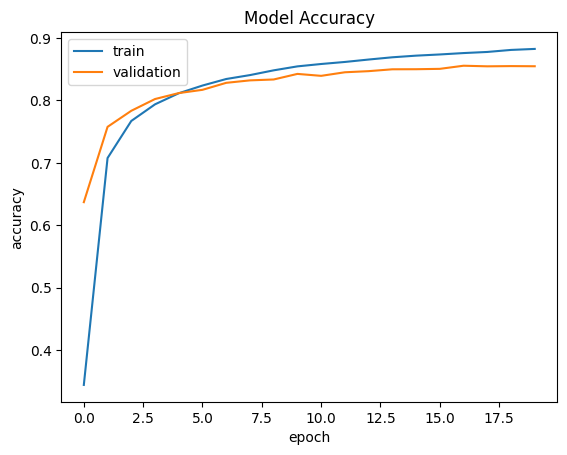

In [ ]:
plt.plot(model_3_v1.history['accuracy'])
plt.plot(model_3_v1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

563/563 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1814
           1       0.88      0.88      0.88      1828
           2       0.91      0.85      0.88      1803
           3       0.83      0.77      0.80      1719
           4       0.88      0.88      0.88      1812
           5       0.82      0.85      0.83      1768
           6       0.78      0.87      0.82      1832
           7       0.88      0.92      0.90      1808
           8       0.80      0.81      0.80      1812
           9       0.87      0.79      0.83      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



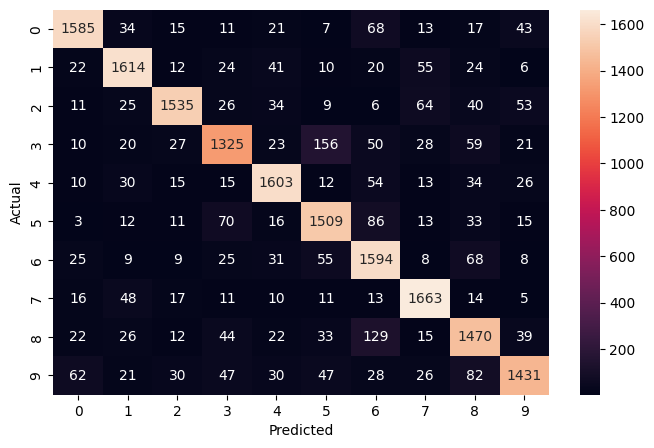

In [ ]:
# Predict, print classification report, & plot confusion matrix heatmap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_3.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:** This model is the most accurate so far, classifying digits with 85% accuracy. The most frequent error still occurs when 3s are misclassified as 5s: 156 out of 1719 are misclassifed, about 9%. Still a significant improvement over previous two models.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clear backend & install libraries
from tensorflow.keras import backend
backend.clear_session()

import numpy as np
import tensorflow as tf

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv2D, LeakyReLU, MaxPooling2D, Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
def cnn_model_2():
  model = Sequential()
  model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', input_shape = (32, 32, 1), activation = 'relu'))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(32))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(Dropout(0.50))
  model.add(Dense(10, activation = 'softmax'))
  optimizer = Adam(learning_rate = 0.0001)
  model.compile(optimizer = optimizer, loss = 'categorical_crossentropy',  metrics = ['accuracy'])
  return model

cnn_model_2()

In [ ]:
model_4 = cnn_model_2()
print(model_4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                     

In [ ]:
# validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30
model_4_v1 = model_4.fit(X_train, y_train, epochs = 30, verbose = 1, batch_size = 128, validation_split = 0.20)

Epoch 1/30
263/263 [==============================] - 7s 13ms/step - loss: 2.2128 - accuracy: 0.1895 - val_loss: 2.2634 - val_accuracy: 0.1127
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 1.5542 - accuracy: 0.4723 - val_loss: 1.6526 - val_accuracy: 0.4425
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 1.0930 - accuracy: 0.6447 - val_loss: 0.7355 - val_accuracy: 0.7927
Epoch 4/30
263/263 [==============================] - 2s 9ms/step - loss: 0.9003 - accuracy: 0.7146 - val_loss: 0.5972 - val_accuracy: 0.8324
Epoch 5/30
263/263 [==============================] - 3s 11ms/step - loss: 0.7935 - accuracy: 0.7525 - val_loss: 0.5477 - val_accuracy: 0.8450
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 0.7194 - accuracy: 0.7771 - val_loss: 0.5638 - val_accuracy: 0.8432
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 0.6652 - accuracy: 0.7937 - val_loss: 0.4883 - val_accuracy: 0.8658
Epo

### **Plot the Training and Validation accuracies and write your observations.**

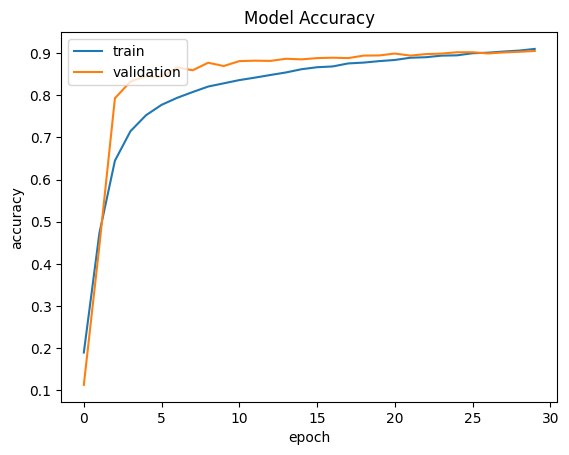

In [ ]:
plt.plot(model_4_v1.history['accuracy'])
plt.plot(model_4_v1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

**Observations:** This model performs well, very quickly, over 90% accurate classifications on the training and test data by the 25th epoch.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

563/563 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1814
           1       0.90      0.91      0.91      1828
           2       0.91      0.91      0.91      1803
           3       0.83      0.88      0.86      1719
           4       0.92      0.92      0.92      1812
           5       0.89      0.90      0.89      1768
           6       0.89      0.89      0.89      1832
           7       0.93      0.91      0.92      1808
           8       0.89      0.88      0.88      1812
           9       0.91      0.89      0.90      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



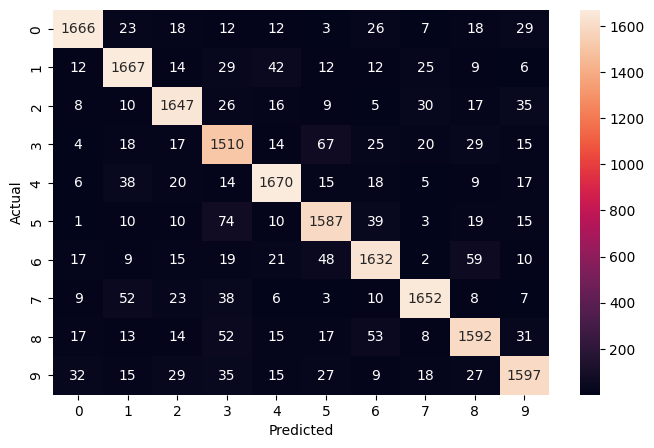

In [ ]:
# Predict, print classification report, & plot confusion matrix heatmap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_4.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:** The fourth model was the most accurate in classifying the handwritten digits. We improved accuracy significantly by introducing convolutions for feature extraction. We also gained accuracy by increasing the complexity and number of layers, and reduced over fitting by including a drop out layer. The predicted accuracy of the fourth model is 90%. It performs better on all digits, including the "tricky" ones. The most frequent misclassification is still classifying a 3 as a 5, but now only occurs in less than 4% of 3s.